In [389]:
# Incluindo bibliotecas
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import itertools
import random
from heapq import nlargest

In [336]:
# Gerando a rede biológica
archive = './HPRD.txt'
Graph = nx.read_edgelist(archive, delimiter = ' ', data = ('pacients',[]))
for node in Graph.nodes:
    Graph.nodes[node]['pacients'] = []
#bipartitinetwork

In [337]:
#Abrindo o arquivo de Genes mutados por pacientes
with open('./ProjetoIC/Output_Files/out.txt') as f:
    lines = f.readlines()

In [338]:
#Gerando tabela de Pacientes por genes
TabelaPacienteGene = [[],[]]
for j in range(0,len(lines),1):
    lista = lines[j].split()
    Gene = lista[0]
    aux = 0
    for i in lista:
        if(aux == 0):
            aux = 1
            continue
        if i in TabelaPacienteGene[0]:
            index = TabelaPacienteGene[0].index(i)
            TabelaPacienteGene[1][index] += " " + Gene
        else:
            TabelaPacienteGene[0].append(i)
            TabelaPacienteGene[1].append(Gene)

In [339]:
TabelaPacienteGene[0][0]

'TCGA-43-5668-01A-01D-1632-08'

In [340]:
# Alimentando o Grafo com dados do MAF
for line in lines:
    Gene = line.split()[0]
    Pacients = line.split()[1:]
    if Gene in list(Graph.nodes):
        Graph.nodes[Gene]['pacients'] = Pacients

In [347]:
len(Graph.nodes['TTN']['pacients'])

342

In [ ]:
#FAzer analises diferentes e apontar apenas os resoltados?
# Imprime grafos com os genes mutados em cor vermelha
maxNumberPacients = 0
for node in Graph.nodes:
    if len(Graph.nodes[node]['pacients']) > maxNumberPacients:
        maxNumberPacients = len(Graph.nodes[node]['pacients'])
color_map = []
limit = maxNumberPacients*0.2
for node in Graph.nodes:
    if len(Graph.nodes[node]['pacients']) >= limit:
        print(node)
        color_map.append('red')
    else:
        color_map.append('green')

options = {
    'node_size': 2000,
}
plt.figure(figsize=(110,110))
pos = nx.spring_layout(Graph, k=50, iterations=20)
nx.draw(Graph, node_color=color_map, with_labels=True, pos=pos, **options)
plt.savefig('testeComCoresEEspaco.png',dpi=100)

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_node("HTTP",mutation=5)
G.add_edges_from([(1,2),(4,0),(5,0),(0,2),(5,1)])
G.add_node(15,pacients=[])
pos = nx.spring_layout(G, k=20, iterations=20)
plt.figure(figsize=(10,10))
nx.draw(G,with_labels=True,pos=pos)

In [ ]:
def search(GraphAux, node, listNodesAlreadyUses):
    #print("Executando com o nó " + str(node))
    global count
    count += 1
    if len(GraphAux.nodes[node]['pacients']) < 10:
        return
    listNodesAlreadyUses.append(node)
    for n in GraphAux.neighbors(node):
        if n not in listNodesAlreadyUses:
            search(GraphAux, n, listNodesAlreadyUses)
            #print("Não executei o nó " + str(n) + " que é vizinho do nó " + str(node))
       # else:
            #print("Já executei o nó " + str(n) + " que é vizinho do nó " + str(node))
    #if len(GraphAux.nodes[node]['pacients']) > 100:
    

In [ ]:
ini = time.time()
num = 100
for i in range(0,num,1):
    avaliaGrafo(959,Graph,0.5)
print((time.time()-ini)/num)

In [13]:
def avaliaGrafo(TotalTam, GraphTest, alpha):
    # Pegar um grafo e aplicar na formula
    listPacients = []
    node_Graph = GraphTest.nodes
    #for node in node_Graph:
    #    list_pacients = Graph.nodes[node]['pacients']
    #    listPacients += [pacients for pacients in list_pacients]
        
    for node in node_Graph:
        #list_pacients = Graph.nodes[node]['pacients']
        listPacients += Graph.nodes[node]['pacients']
    #list_pacients = Graph.nodes[node]['pacients']
    #listPacients += [pacients for node in node_Graph for pacients in Graph.nodes[node]['pacients']]
        #for pacient in list_pacients:
        #    listPacients.append(pacient)
    #listPacients = [pacient for pacient in GraphTest.nodes[node]['pacients'] for node in GraphTest.nodes]            
    listPacients = list(dict.fromkeys(listPacients))
        #listPacients = [pacient for pacient in GraphTest.nodes[node]['pacients'] if pacient not in listPacients]
    #cube_numbers = [n**3 for n in range(1,10) if n%2 == 1]            
    x = TotalTam - len(listPacients)
    tamG = len(GraphTest.nodes)
    return x*alpha + (1-alpha)*tamG

294.5
288.5
284.0
281.0
147.0
120.5
102.5
94.0
92.0
90.5
89.0
88.0
87.0
86.5
86.0
85.5
85.0
84.5
84.0
83.5
83.0
82.5
Tempo gasto: 59.518497705459595
Menor nota alcançada: 82.5
22


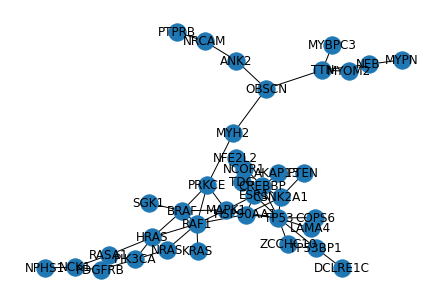

In [146]:
ini = time.time()
Gh = nx.Graph()
Gh.add_node("TTN")
antigaMelhorNota = np.inf
i = 0
count = 0
for i in range(0,30,1):
    listaDeNetos = []
    menorNota = np.inf
    ArmazenarListaAuxiliar = []
    nodes_Gh = Gh.nodes
    for node in nodes_Gh:
        neighbors_node = Graph.neighbors(node)
        for son in neighbors_node:
            neighbors_son = Graph.neighbors(son)
            for grandSon in neighbors_son:
                if (grandSon not in Gh) and (grandSon not in listaDeNetos):
                    listaAuxiliar = list(nodes_Gh)
                    listaAuxiliar.append(son)
                    listaAuxiliar.append(grandSon)
                    nota = avaliaGrafo(956,nx.subgraph(Graph,listaAuxiliar),0.5)
                    if(nota < menorNota):
                        menorNota = nota
                        ArmazenarListaAuxiliar = listaAuxiliar
                    #listaDeNetos.append(grandSon)
            if (son not in Gh) and (son not in listaDeNetos):
                listaAuxiliar = list(nodes_Gh)
                listaAuxiliar.append(son)
                nota = avaliaGrafo(956,nx.subgraph(Graph,listaAuxiliar),0.5)
                if(nota < menorNota):
                    menorNota = nota
                    ArmazenarListaAuxiliar = listaAuxiliar
                listaDeNetos.append(son)

    Gh = nx.subgraph(Graph,ArmazenarListaAuxiliar)
    if(menorNota == antigaMelhorNota):
        break;
    antigaMelhorNota = menorNota;
    print(menorNota)
print("Tempo gasto: " + str(time.time()-ini))
print("Menor nota alcançada: "+ str(menorNota))
print(i)
resultadoAlgoritmo1 = list(Gh.nodes)
nx.draw(Gh,with_labels=True)

77

In [814]:
listateste = Gh.nodes['NEB']['pacients'] + Gh.nodes['MYPN']['pacients']
listateste = list(dict.fromkeys(listateste))
len(listateste)

listateste3 = listateste + listateste2
listateste3 = list(dict.fromkeys(listateste3))
len(listateste3)

In [840]:
listateste2 = Gh.nodes['TTN']['pacients'] + Gh.nodes['OBSCN']['pacients'] + Gh.nodes['ANK2']['pacients']
listateste2 = list(dict.fromkeys(listateste2))
#listateste2 += Gh.nodes['NEB']['pacients']
listateste2 = list(dict.fromkeys(listateste2))
len(listateste2)

370

956

294.5
288.5
284.0
281.0
147.0
120.5
102.5
94.0
92.0
90.5
89.0
88.0
87.0
86.5
86.0
85.5
85.0
84.5
84.0
83.5
83.0
82.5
82.0
Tempo gasto: 9.475323677062988
Menor nota alcançada: 82.0
23
0
222465


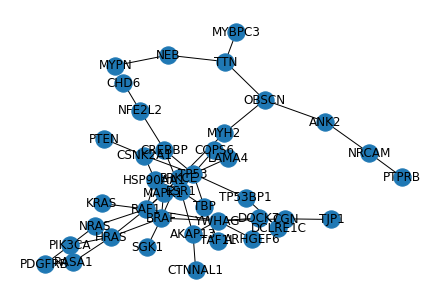

In [214]:
# Versão 1.3
ini = time.time()
Gh = nx.Graph()
Gh.add_node("TTN")
#Gh.add_edge("TTN","OBSCN")
antigaMelhorNota = np.inf
i = 0
count = 0
alpha = 0.5
TotalVerification = 0
# Verifica o numero de pacientes que existem no grafo inteiro
listPacientsInCompletGraph = []
node_Graph = Graph.nodes
        
for node in node_Graph:
    listPacientsInCompletGraph += Graph.nodes[node]['pacients']
listPacientsInCompletGraph = list(dict.fromkeys(listPacientsInCompletGraph))

maxPacients = len(listPacientsInCompletGraph)

listaParaNaoVerificar = []
# Começa até não conseguir melhorar
for i in range(0,30,1):

    # Verifica o numero de pacientes que existem no grafo Gh
    listPacientsInGh = []
    nodes_Gh = Gh.nodes
    for node in nodes_Gh:
        listPacientsInGh += Graph.nodes[node]['pacients']
    listPacientsInGh = list(dict.fromkeys(listPacientsInGh))

    pacientsInGh = len(listPacientsInGh)
    
    menorNota = np.inf
    # Lista que permiter atualizar o grafo Gh
    ArmazenarListaAuxiliar = []
    # Elimina processamentos duplicados
    jaVerificados = []
    
    listaAuxiliar = list(nodes_Gh)
    #listPacientsInGh = []
    list_son = []
    for node in nodes_Gh:
        list_son += [son for son in Graph.neighbors(node) if son not in Gh if son not in listaParaNaoVerificar]
        #listPacientsInGh += Graph.nodes[node]['pacients']
    list_son = list(dict.fromkeys(list_son))
    #listPacientsInGh = list(dict.fromkeys(listPacientsInGh))
    for son in list_son:
                         
        # Avaliação
        listPacientsInSon = Graph.nodes[son]['pacients']
        
        difference_son = len([item for item in listPacientsInSon if item not in listPacientsInGh])
    
        nota = alpha*(maxPacients - (pacientsInGh + difference_son)) + (1-alpha)*(len(nodes_Gh) + 1)
        TotalVerification += 1
        # Fim avaliação
        
        #jaVerificados += [son]
        if(nota < menorNota):
            menorNota = nota
            ArmazenarListaAuxiliar = listaAuxiliar+[son]
        count = 0
        list_grandSon = []
        list_grandSon += [grandSon for grandSon in Graph.neighbors(son) if grandSon not in Gh if grandSon not in jaVerificados if grandSon not in listaParaNaoVerificar]
        for grand_Son in list_grandSon:
                 
            # Avaliação
            listPacientsInGrandSon = Graph.nodes[grand_Son]['pacients']

            difference_grandSon = len([item for item in listPacientsInGrandSon if item not in listPacientsInGh if item not in listPacientsInSon])
            #print(son + " -> " + str(difference_son) + " , " + grand_Son + " -> " + str(difference_grandSon) + " , " + str(difference_son + difference_grandSon))    
            
            if(difference_grandSon != 0) :
                count = 1
            #else:
                #listaParaNaoVerificar += [grand_Son]
            nota = alpha*(maxPacients - (pacientsInGh + difference_son + difference_grandSon)) + (1-alpha)*(len(nodes_Gh) + 2) 
            TotalVerification += 1
            # Fim avaliação          
            
            #jaVerificados += [grand_Son]
            if(nota < menorNota):
                menorNota = nota
                ArmazenarListaAuxiliar = listaAuxiliar+[son]+[grand_Son]
        
        #if (difference_son == 0 and count == 0):
            #listaParaNaoVerificar += [son]
    if(len(ArmazenarListaAuxiliar) != 0):
        Gh = nx.subgraph(Graph,ArmazenarListaAuxiliar)
    if(menorNota == antigaMelhorNota):
        menorNota = antigaMelhorNota;
        break;
    antigaMelhorNota = menorNota;
    print(menorNota)
print("Tempo gasto: " + str(time.time()-ini))
print("Menor nota alcançada: "+ str(menorNota))
print(i)
print(count)
print(TotalVerification)
resultadoAlgoritmo2= list(Gh.nodes)
nx.draw(Gh,with_labels=True)

In [15]:
listateste = Gh.nodes['NRCAM']['pacients'] + Gh.nodes['PTPRB']['pacients']
listateste = list(dict.fromkeys(listateste))
len(listateste)
listateste2 = Gh.nodes['TTN']['pacients'] + Gh.nodes['OBSCN']['pacients'] + Gh.nodes['ANK2']['pacients']
listateste2 = list(dict.fromkeys(listateste2))
len(listateste2)
listateste3 = listateste + listateste2
listateste3 = list(dict.fromkeys(listateste3))
len(listateste3)

382

In [848]:
list(Graph.neighbors('NEB'))

['TTN', 'ACTN4', 'MYPN', 'TMOD1']

In [835]:
difference_sonteste

0

In [211]:
len(list(set(resultadoAlgoritmo2) & set(resultadoAlgoritmo3)))

41

In [212]:
print(len(resultadoAlgoritmo3))
print(len(resultadoAlgoritmo2))

41
41


294.5
288.5
284.0
281.0
147.0
120.5
102.5
94.0
92.0
90.5
89.0
88.0
87.0
86.5
86.0
85.5
85.0
84.5
84.0
83.5
83.0
82.5
82.0
Tempo gasto: 13.422136783599854
Menor nota alcançada: 82.0
23
92295


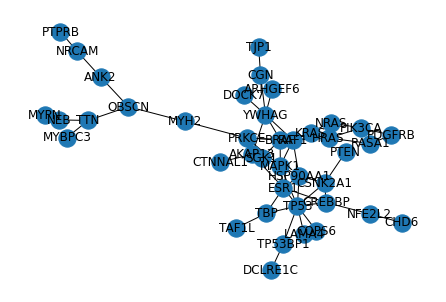

In [175]:
# Versão 1.4
ini = time.time()
# Gera subgrafo com o melhor de todos (aleatorizar para os 5 melhores)
Gh = nx.Graph()
Gh.add_node("TTN")

# Define o alpha utilizado
alpha = 0.5

# Descobre quantos pacients existem no total no grafo
listPatientsInGraph = []
for node in Graph:
    listPatientsInGraph += Graph.nodes[node]['pacients']
listPatientsInGraph = list(dict.fromkeys(listPatientsInGraph))
maxPatients = len(listPatientsInGraph)

antigaMelhorNota = np.inf

listaParaNaoVerificar = []
TotalVerification = 0
for i in range(0,30,1):
    # Criar lista com os pacientes cobertos por Gh na interação atual
    listPatientsInGh = []
    for node in Gh:
        listPatientsInGh += Graph.nodes[node]['pacients']
    listPatientsInGh = list(dict.fromkeys(listPatientsInGh))
    patientsInGh = len(listPatientsInGh)
    # Define o tamanho de Gh na interação atual
    sizeOfGh = len(Gh.nodes)

    menorNota = np.inf
    
    nodesNewSubgraph = list(Gh.nodes)
    
    for node in Gh:

        neighborsOfNode = Graph.neighbors(node)

        listOfSon = []
        #listOfSon += [son for son in neighborsOfNode if son not in Gh]
        listOfSon += [son for son in neighborsOfNode if son not in Gh if son not in listaParaNaoVerificar]
        listOfSon = list(dict.fromkeys(listOfSon))

        for son in listOfSon:
            
            possoEliminar = 1
            
            listPatientsInSon = Graph.nodes[son]['pacients']

            neighborsOfSon = list(Graph.neighbors(son))

            listOfGrandSon = []
            #listOfGrandSon += [grandSon for grandSon in neighborsOfSon if grandSon not in Gh]
            listOfGrandSon += [grandSon for grandSon in neighborsOfSon if grandSon not in Gh if grandSon not in listaParaNaoVerificar]
            listOfGrandSon = list(dict.fromkeys(listOfGrandSon))
             
            difference_son = len([item for item in listPatientsInSon if item not in listPatientsInGh])
            
            #coveredPatients = listPatientsInGh + listPatientsInSon
            #coveredPatients = list(dict.fromkeys(coveredPatients))
            
            #nota = alpha*(maxPatients - len(coveredPatients)) + (1-alpha)*(sizeOfGh + 1)
            nota = alpha*(maxPatients - (patientsInGh + difference_son)) + (1-alpha)*(sizeOfGh + 1)
            TotalVerification += 1
            if(nota < menorNota):
                menorNota = nota
                nodesNewSubgraph = list(Gh.nodes) + [son]

            for grandSon in listOfGrandSon:

                listPatientsInGrandSon = Graph.nodes[grandSon]['pacients']                                                          
                
                difference_grandSon = len([item for item in listPatientsInGrandSon if item not in listPatientsInGh if item not in listPatientsInSon])
                
                #coveredPatients = listPatientsInGh + listPatientsInSon + listPatientsInGrandSon
                #coveredPatients = list(dict.fromkeys(coveredPatients))
                
                if((difference_grandSon + difference_son) != 0):
                    possoEliminar = 0 

                    #nota = alpha*(maxPatients - len(coveredPatients)) + (1-alpha)*(sizeOfGh + 2)
                    nota = alpha*(maxPatients - (patientsInGh + difference_son + difference_grandSon)) + (1-alpha)*(sizeOfGh + 2)
                    TotalVerification += 1
                    if(nota < menorNota):
                        menorNota = nota
                        nodesNewSubgraph = list(Gh.nodes) + [son] + [grandSon]
            
            if(possoEliminar == 1):
                listaParaNaoVerificar += [son]

    Gh = nx.subgraph(Graph,nodesNewSubgraph)
    if(menorNota == antigaMelhorNota):
        menorNota = antigaMelhorNota;
        break;
    antigaMelhorNota = menorNota;
    print(menorNota)

print("Tempo gasto: " + str(time.time()-ini))
print("Menor nota alcançada: "+ str(menorNota))
print(i)
print(TotalVerification)
resultadoAlgoritmo3= list(Gh.nodes)
nx.draw(Gh,with_labels=True)

294.5
288.5
284.0
281.0
147.0
120.5
102.5
94.0
92.0
90.5
89.0
88.0
87.0
86.5
86.0
85.5
85.0
84.5
84.0
83.5
83.0
82.5
82.0
Tempo gasto: 7.266955375671387
Menor nota alcançada: 82.0
23
222465


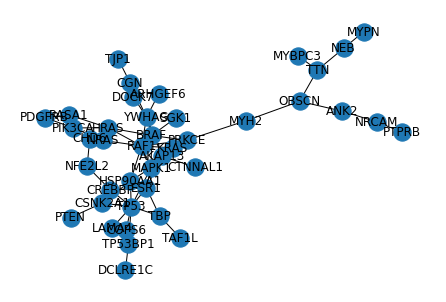

In [205]:
# Versão 1.5 (interações igual 1.3, porém mais rapido)
ini = time.time()
# Gera subgrafo com o melhor de todos (aleatorizar para os 5 melhores)
Gh = nx.Graph()
Gh.add_node("TTN")

# Define o alpha utilizado
alpha = 0.5

# Descobre quantos pacients existem no total no grafo
listPatientsInGraph = []
for node in Graph:
    listPatientsInGraph += Graph.nodes[node]['pacients']
listPatientsInGraph = list(dict.fromkeys(listPatientsInGraph))
maxPatients = len(listPatientsInGraph)

antigaMelhorNota = np.inf

listaParaNaoVerificar = []
TotalVerification = 0
for i in range(0,30,1):
    # Criar lista com os pacientes cobertos por Gh na interação atual
    listPatientsInGh = []
    for node in Gh:
        listPatientsInGh += Graph.nodes[node]['pacients']
    listPatientsInGh = list(dict.fromkeys(listPatientsInGh))
    patientsInGh = len(listPatientsInGh)
    # Define o tamanho de Gh na interação atual
    sizeOfGh = len(Gh.nodes)

    menorNota = np.inf
    
    nodesNewSubgraph = list(Gh.nodes)
    
    listOfSon = []
    for node in Gh.nodes:
        neighborsOfNode = Graph.neighbors(node)
        listOfSon += [son for son in neighborsOfNode if son not in Gh]
        #listPacientsInGh += Graph.nodes[node]['pacients']
    listOfSon = list(dict.fromkeys(listOfSon))

    for son in listOfSon:

        possoEliminar = 1

        listPatientsInSon = Graph.nodes[son]['pacients']

        neighborsOfSon = list(Graph.neighbors(son))

        listOfGrandSon = []
        #listOfGrandSon += [grandSon for grandSon in neighborsOfSon if grandSon not in Gh]
        listOfGrandSon += [grandSon for grandSon in neighborsOfSon if grandSon not in Gh]
        listOfGrandSon = list(dict.fromkeys(listOfGrandSon))

        difference_son = len([item for item in listPatientsInSon if item not in listPatientsInGh])
        
        #coveredPatients = listPatientsInGh + listPatientsInSon
        #coveredPatients = list(dict.fromkeys(coveredPatients))

        #nota = alpha*(maxPatients - len(coveredPatients)) + (1-alpha)*(sizeOfGh + 1)
        nota = alpha*(maxPatients - (patientsInGh + difference_son)) + (1-alpha)*(sizeOfGh + 1)
        TotalVerification += 1
        if(nota < menorNota):
            menorNota = nota
            nodesNewSubgraph = list(Gh.nodes) + [son]

        for grandSon in listOfGrandSon:

            listPatientsInGrandSon = Graph.nodes[grandSon]['pacients']                                                          

            difference_grandSon = len([item for item in listPatientsInGrandSon if item not in listPatientsInGh if item not in listPatientsInSon])

            #coveredPatients = listPatientsInGh + listPatientsInSon + listPatientsInGrandSon
            #coveredPatients = list(dict.fromkeys(coveredPatients))

            #nota = alpha*(maxPatients - len(coveredPatients)) + (1-alpha)*(sizeOfGh + 2)
            nota = alpha*(maxPatients - (patientsInGh + difference_son + difference_grandSon)) + (1-alpha)*(sizeOfGh + 2)
            TotalVerification += 1
            if(nota < menorNota):
                menorNota = nota
                nodesNewSubgraph = list(Gh.nodes) + [son] + [grandSon]

    Gh = nx.subgraph(Graph,nodesNewSubgraph)
    if(menorNota == antigaMelhorNota):
        menorNota = antigaMelhorNota;
        break;
    antigaMelhorNota = menorNota;
    print(menorNota)

print("Tempo gasto: " + str(time.time()-ini))
print("Menor nota alcançada: "+ str(menorNota))
print(i)
print(TotalVerification)
resultadoAlgoritmo3= list(Gh.nodes)
nx.draw(Gh,with_labels=True)

294.5
288.5
284.0
281.0
147.0
120.5
102.5
94.0
92.0
90.5
89.0
88.0
87.0
86.5
86.0
85.5
85.0
84.5
84.0
83.5
83.0
82.5
82.0
Tempo gasto: 7.967912197113037
Menor nota alcançada: 82.0
23
55490


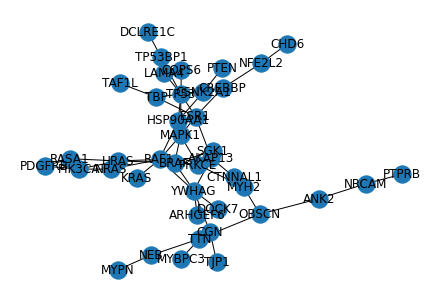

In [213]:
# Versão 1.6 (Com menos interações, tempo menor)

ini = time.time()
# Gera subgrafo com o melhor de todos (aleatorizar para os 5 melhores)
Gh = nx.Graph()
Gh.add_node("TTN")

# Define o alpha utilizado
alpha = 0.5

# Descobre quantos pacients existem no total no grafo
listPatientsInGraph = []
for node in Graph:
    listPatientsInGraph += Graph.nodes[node]['pacients']
listPatientsInGraph = list(dict.fromkeys(listPatientsInGraph))
maxPatients = len(listPatientsInGraph)

antigaMelhorNota = np.inf

listaParaNaoVerificar = []
TotalVerification = 0
for i in range(0,30,1):
    # Criar lista com os pacientes cobertos por Gh na interação atual
    listPatientsInGh = []
    for node in Gh:
        listPatientsInGh += Graph.nodes[node]['pacients']
    listPatientsInGh = list(dict.fromkeys(listPatientsInGh))
    patientsInGh = len(listPatientsInGh)
    # Define o tamanho de Gh na interação atual
    sizeOfGh = len(Gh.nodes)

    menorNota = np.inf
    
    nodesNewSubgraph = list(Gh.nodes)
    
    listOfSon = []
    for node in Gh.nodes:
        neighborsOfNode = Graph.neighbors(node)
        listOfSon += [son for son in neighborsOfNode if son not in Gh if son not in listaParaNaoVerificar]
        #listPacientsInGh += Graph.nodes[node]['pacients']
    listOfSon = list(dict.fromkeys(listOfSon))

    for son in listOfSon:

        possoEliminar = 1

        listPatientsInSon = Graph.nodes[son]['pacients']

        neighborsOfSon = list(Graph.neighbors(son))

        listOfGrandSon = []
        #listOfGrandSon += [grandSon for grandSon in neighborsOfSon if grandSon not in Gh]
        listOfGrandSon += [grandSon for grandSon in neighborsOfSon if grandSon not in Gh  if grandSon not in listaParaNaoVerificar]
        listOfGrandSon = list(dict.fromkeys(listOfGrandSon))

        difference_son = len([item for item in listPatientsInSon if item not in listPatientsInGh])
        
        if(difference_son != 0):
            possoEliminar = 0
            #coveredPatients = listPatientsInGh + listPatientsInSon
            #coveredPatients = list(dict.fromkeys(coveredPatients))

            #nota = alpha*(maxPatients - len(coveredPatients)) + (1-alpha)*(sizeOfGh + 1)
            nota = alpha*(maxPatients - (patientsInGh + difference_son)) + (1-alpha)*(sizeOfGh + 1)
            TotalVerification += 1
            if(nota < menorNota):
                menorNota = nota
                nodesNewSubgraph = list(Gh.nodes) + [son]

        for grandSon in listOfGrandSon:

            listPatientsInGrandSon = Graph.nodes[grandSon]['pacients']                                                          

            difference_grandSon = len([item for item in listPatientsInGrandSon if item not in listPatientsInGh if item not in listPatientsInSon])

            #coveredPatients = listPatientsInGh + listPatientsInSon + listPatientsInGrandSon
            #coveredPatients = list(dict.fromkeys(coveredPatients))

            if((difference_grandSon + difference_son) != 0):
                possoEliminar = 0 

                #nota = alpha*(maxPatients - len(coveredPatients)) + (1-alpha)*(sizeOfGh + 2)
                nota = alpha*(maxPatients - (patientsInGh + difference_son + difference_grandSon)) + (1-alpha)*(sizeOfGh + 2)
                TotalVerification += 1
                if(nota < menorNota):
                    menorNota = nota
                    nodesNewSubgraph = list(Gh.nodes) + [son] + [grandSon]
        #possoEliminar = 0 
        if(possoEliminar == 1):
            listaParaNaoVerificar += [son]

    Gh = nx.subgraph(Graph,nodesNewSubgraph)
    if(menorNota == antigaMelhorNota):
        menorNota = antigaMelhorNota;
        break;
    antigaMelhorNota = menorNota;
    print(menorNota)

print("Tempo gasto: " + str(time.time()-ini))
print("Menor nota alcançada: "+ str(menorNota))
print(i)
print(TotalVerification)
resultadoAlgoritmo3= list(Gh.nodes)
nx.draw(Gh,with_labels=True)

In [203]:
listaParaNaoVerificar

['AMPD1',
 'ANKRD1',
 'ANKRD23',
 'AMPD1',
 'PTPN7',
 'DUSP1',
 'METAP2',
 'DUSP7',
 'SNCG',
 'LAMTOR3',
 'KLF11',
 'RPS6KA4',
 'DYRK1B',
 'ERF',
 'MAFA',
 'DUSP6',
 'DUSP2',
 'SLC9A1',
 'CMTM3',
 'DUSP9',
 'CSDA',
 'ANKRD1',
 'ANKRD23',
 'TOP2B',
 'SMARCD1',
 'RRM2',
 'ZNF148',
 'AURKA',
 'CDC14A',
 'RRM2B',
 'SHISA5',
 'TAF9B',
 'PRIM1',
 'ING4',
 'TP53RK',
 'ANKRD2',
 'PLAGL1',
 'BANP',
 'TFAP2C',
 'THAP8',
 'NMT2',
 'STRA13',
 'SMYD2',
 'ZNHIT1',
 'DGKD',
 'AMPD1',
 'RAP1GAP',
 'GRM5',
 'MYOM1',
 'MYBPC1',
 'PTPN7',
 'DUSP1',
 'GMFB',
 'METAP2',
 'DUSP7',
 'SNCG',
 'LAMTOR3',
 'KLF11',
 'RPS6KA4',
 'DYRK1B',
 'PEBP1',
 'ERF',
 'KSR2',
 'MAFA',
 'DUSP6',
 'DUSP2',
 'SLC9A1',
 'CMTM3',
 'DUSP9',
 'CSDA',
 'KSR1',
 'MAP3K1',
 'STK3',
 'RSU1',
 'INTS10',
 'OIP5',
 'ANKRD1',
 'ANKRD23',
 'TOP2B',
 'SMARCD1',
 'RRM2',
 'BRCA2',
 'ZNF148',
 'AURKA',
 'CDC14A',
 'RRM2B',
 'SHISA5',
 'TAF9B',
 'PRIM1',
 'ING4',
 'TP53RK',
 'ANKRD2',
 'PLAGL1',
 'BANP',
 'TFAP2C',
 'MAD2L1BP',
 'WDR33',
 'S1

In [198]:
list(Graph.neighbors('ANKRD23'))

['TTN', 'MYPN']

In [86]:
lista1 = Graph.nodes['TTN']['pacients']
lista2 = Graph.nodes['OBSCN']['pacients']
lista3 = Graph.nodes['ANK2']['pacients']

In [91]:
len(lista1 + lista2 + lista3)

477

In [93]:
listaFinal = list(dict.fromkeys(lista1 + lista2 + lista3))
len(listaFinal)

370

In [440]:
# Versão 1.7 (1.6 generalizando como funcao)
def AlgoritmoV1_6(alpha):
    ini = time.time()
    # Gera subgrafo com o melhor de todos (aleatorizar para os 5 melhores)
    
    ordem = [0,0,0,0,0]
    bestNodes = ["","","","",""]
    AuxiliarGraph = Graph.copy()

    for i in range(0,5,1):
        bestNode = ""
        for node in AuxiliarGraph:
            num = len(AuxiliarGraph.nodes[node]['pacients'])
            if (num > ordem[i]):
                bestNodes[i] = node
                ordem[i] = num
        AuxiliarGraph.remove_node(bestNodes[i])
    
    randNumber = random.randint(0,np.sum(ordem))
    escolhido = 0
    soma = 0
    soma += ordem[escolhido]
    while(randNumber > soma):
        escolhido += 1
        soma += ordem[escolhido]

    Gh = nx.Graph()
    Gh.add_node(bestNodes[escolhido])

    # Descobre quantos pacients existem no total no grafo
    listPatientsInGraph = []
    for node in Graph:
        listPatientsInGraph += Graph.nodes[node]['pacients']
    listPatientsInGraph = list(dict.fromkeys(listPatientsInGraph))
    maxPatients = len(listPatientsInGraph)

    antigaMelhorNota = np.inf

    listaParaNaoVerificar = []
    TotalVerification = 0
    
    while(True):
        # Criar lista com os pacientes cobertos por Gh na interação atual
        listPatientsInGh = []
        for node in Gh:
            listPatientsInGh += Graph.nodes[node]['pacients']
        listPatientsInGh = list(dict.fromkeys(listPatientsInGh))
        patientsInGh = len(listPatientsInGh)
        # Define o tamanho de Gh na interação atual
        sizeOfGh = len(Gh.nodes)

        menorNota = np.inf

        nodesNewSubgraph = list(Gh.nodes)

        listOfSon = []
        for node in Gh.nodes:
            neighborsOfNode = Graph.neighbors(node)
            listOfSon += [son for son in neighborsOfNode if son not in Gh if son not in listaParaNaoVerificar]

        listOfSon = list(dict.fromkeys(listOfSon))

        for son in listOfSon:

            possoEliminar = 1

            listPatientsInSon = Graph.nodes[son]['pacients']

            neighborsOfSon = list(Graph.neighbors(son))

            listOfGrandSon = []

            listOfGrandSon += [grandSon for grandSon in neighborsOfSon if grandSon not in Gh  if grandSon not in listaParaNaoVerificar]
            listOfGrandSon = list(dict.fromkeys(listOfGrandSon))

            difference_son = len([item for item in listPatientsInSon if item not in listPatientsInGh])

            if(difference_son != 0):
                possoEliminar = 0

                nota = alpha*(maxPatients - (patientsInGh + difference_son)) + (1-alpha)*(sizeOfGh + 1)
                TotalVerification += 1
                if(nota < menorNota):
                    menorNota = nota
                    nodesNewSubgraph = list(Gh.nodes) + [son]

            for grandSon in listOfGrandSon:

                listPatientsInGrandSon = Graph.nodes[grandSon]['pacients']                                                          

                difference_grandSon = len([item for item in listPatientsInGrandSon if item not in listPatientsInGh if item not in listPatientsInSon])

                if((difference_grandSon + difference_son) != 0):
                    possoEliminar = 0 
                    
                    nota = alpha*(maxPatients - (patientsInGh + difference_son + difference_grandSon)) + (1-alpha)*(sizeOfGh + 2)
                    TotalVerification += 1
                    if(nota < menorNota):
                        menorNota = nota
                        nodesNewSubgraph = list(Gh.nodes) + [son] + [grandSon]

            if(possoEliminar == 1):
                listaParaNaoVerificar += [son]

        Gh = nx.subgraph(Graph,nodesNewSubgraph)
        if(menorNota == np.inf or menorNota >= antigaMelhorNota):
            menorNota = antigaMelhorNota;
            break;
        antigaMelhorNota = menorNota;
    return Gh

In [450]:
counterGenes = {'gene':[],'frequency':[]}
numberInterations = 20
for i in range(0,numberInterations,1):
    GraphTest = AlgoritmoV1_6(0.2)
    nodesQueApareceram = GraphTest.nodes
    for j in nodesQueApareceram:
        achou = 0
        for k in counterGenes['gene']:
            if( k == j ):
                index = counterGenes['gene'].index(j)
                counterGenes['frequency'][index] += 1
                achou = 1
        if(achou == 0):
            counterGenes['gene'].append(j)
            counterGenes['frequency'].append(1)
for i in range(0,len(counterGenes['frequency']),1):
    counterGenes['frequency'][i] /= numberInterations
counterGenes

{'gene': ['HRAS',
  'BRCA2',
  'PIK3CA',
  'MAPK1',
  'RAF1',
  'MAP2K1',
  'TP53',
  'BIRC6',
  'NRAS',
  'BRAF',
  'OBSCN',
  'ANK2',
  'TTN',
  'MYOM1',
  'LGALS1',
  'MUC16',
  'MSLN',
  'FAT1',
  'HOMER3',
  'RYR2',
  'RYR3',
  'CACNA1C',
  'AKAP6',
  'RYR1'],
 'frequency': [0.4,
  0.4,
  0.4,
  0.4,
  0.4,
  0.4,
  0.4,
  0.4,
  0.4,
  0.4,
  0.4,
  0.4,
  0.4,
  0.4,
  0.15,
  0.15,
  0.15,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05]}

In [288]:
counterGenes

['HRAS',
 'ANK2',
 'NEB',
 'MAPK1',
 'NRCAM',
 'MYH2',
 'RAF1',
 'PEX5L',
 'PTPRB',
 'MYPN',
 'OBSCN',
 'TP53',
 'NRAS',
 'KRAS',
 'BRAF',
 'PRKCE',
 'TTN']

In [285]:
list(GraphTest.nodes)

['HRAS',
 'ANK2',
 'NEB',
 'MAPK1',
 'NRCAM',
 'MYH2',
 'RAF1',
 'PEX5L',
 'PTPRB',
 'MYPN',
 'OBSCN',
 'TP53',
 'NRAS',
 'KRAS',
 'BRAF',
 'PRKCE',
 'TTN']

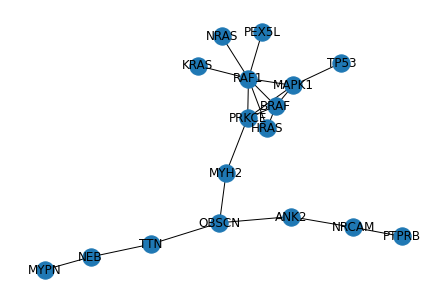

In [283]:
nx.draw(GraphTest,with_labels=True)

In [269]:
counterGenes = [{'gene':"",'frequency':0}]*100

In [273]:
counterGenes[99]['frequency']

0

In [386]:
# Gerando a rede biológica
archive = './HPRD.txt'
Graph = nx.read_edgelist(archive, delimiter = ' ', data = ('pacients',[]))
for i in Graph.nodes:
    Graph.nodes[i]['pacients'] = []

#Abrindo o arquivo de Genes mutados por pacientes
with open('./ProjetoIC/Output_Files/out.txt') as f:
    lines = f.readlines()
    
# Criando uma tabela de Genes por pacientes
TabelaPacienteGene = {'patient': [], 'mutations': []}
for line in lines:
    gene = line.split()[0]
    lista = line.split()[1:]
    for j in lista:
        if j in TabelaPacienteGene['patient']:
            TabelaPacienteGene['mutations'][TabelaPacienteGene['patient'].index(j)] += " " + gene
        else:
            TabelaPacienteGene['patient'].append(j)
            TabelaPacienteGene['mutations'].append(gene)
            
# Alimentando o Grafo com dados do MAF
tamTotal = len(TabelaPacienteGene['patient'])
TabelaPacienteGeneTemporaria = TabelaPacienteGene
for i in range(0,int(tamTotal/3),1):
    index = random.randint(0,tamTotal-i-1)
    for gene in TabelaPacienteGeneTemporaria['mutations'][index].split():
        if gene in Graph:
            Graph.nodes[gene]['pacients'] += [TabelaPacienteGeneTemporaria['patient'][index]]
    TabelaPacienteGeneTemporaria['patient'].pop(index)
    TabelaPacienteGeneTemporaria['mutations'].pop(index)

In [387]:
len(Graph.nodes['TTN']['pacients'])

123

In [362]:
for i in range(0,10,1):
    print(random.randint(0, 3))

0
1
2
0
3
0
2
2
3
0


In [390]:
data = [1,2,3,4,5,6,7,8,9]
nlargest(3, data)

[9, 8, 7]

In [405]:
ordem = [0,0,0,0,0]
bestNodes = ["","","","",""]
AuxiliarGraph = Graph.copy()

print(len(AuxiliarGraph.nodes))

for i in range(0,5,1):
    bestNode = ""
    for node in AuxiliarGraph:
        num = len(AuxiliarGraph.nodes[node]['pacients'])
        if (num > ordem[i]):
            bestNodes[i] = node
            ordem[i] = num
    AuxiliarGraph.remove_node(bestNodes[i])
len(AuxiliarGraph.nodes)

9039


9034

In [406]:
bestNodes

['TTN', 'TP53', 'BRAF', 'MUC16', 'RYR2']

In [439]:
for i in range(0,10,1):
    

4
0
1
1
0
3
2
0
1
0


In [411]:
soma

123